<a href="https://colab.research.google.com/github/tmd03/ML_study/blob/main/prophet_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## prophet 연습

In [ ]:
pip install holiday

In [ ]:
 pip install prophet # Prophet 설치

In [ ]:
# 분석용 라이브러리 호출
import pandas as pd
from prophet import Prophet
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet.plot import add_changepoints_to_plot
import holidays

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### python 함수(def)

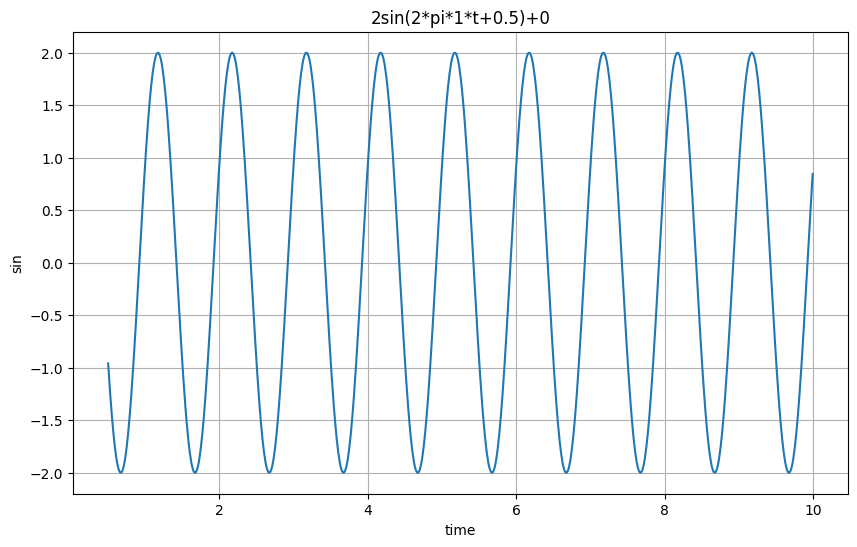

In [ ]:
def plotSinWave(amp, freq, endTime, sampleTime, startTime, bias):
    """
    plot sin wave
    y = a sin(2 pi f t + t_0) + b
    """
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias

    plt.figure(figsize=(10,6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('sin')
    plt.title(
        str(amp) + 'sin(2*pi*' + str(freq) + '*t+' + str(startTime)+ ')+' + str(bias)
    )
    plt.show()

plotSinWave(2, 1, 10, 0.01, 0.5, 0)

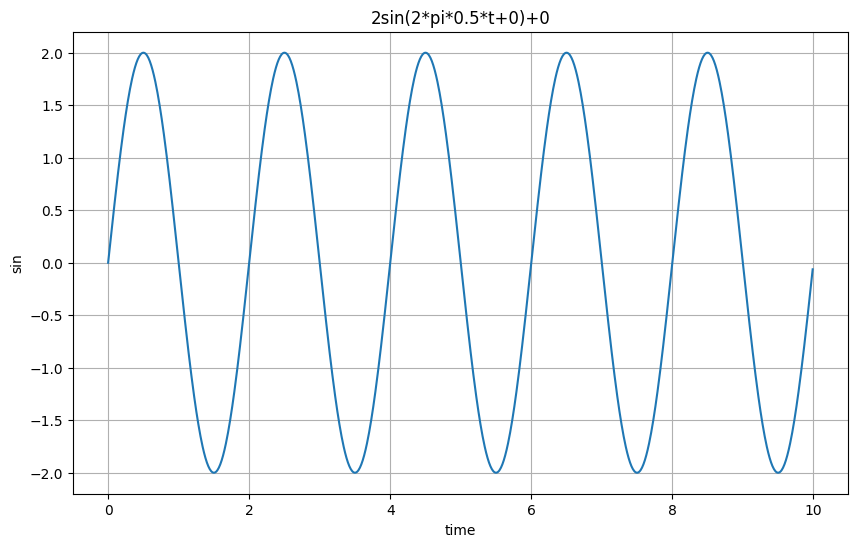

In [ ]:
def plotSinWave(**kwargs):
    """
    plot sin wave
    y = a sin(2 pi f t + t_0) + b
    """
    endTime = kwargs.get('endTime', 1)
    sampleTime = kwargs.get('sampleTime', 0.01)
    amp = kwargs.get('amp', 1)
    freq = kwargs.get('freq', 1)
    startTime = kwargs.get('startTime', 0)
    bias = kwargs.get('bias',0)
    figsize = kwargs.get('figsize', (10,6))

    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias

    plt.figure(figsize=(10,6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('sin')
    plt.title(
        str(amp) + 'sin(2*pi*' + str(freq) + '*t+' + str(startTime)+ ')+' + str(bias)
    )
    plt.show()

plotSinWave(amp=2, freq=0.5, endTime=10)

In [ ]:
time =np.linspace(0,1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range('2024-03-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds':ds, 'y':result})
df.head()


,ds,y
0,2024-03-01,0.000000
1,2024-03-02,0.103243
2,2024-03-03,0.205382
3,2024-03-04,0.305326
4,2024-03-05,0.402007


<Axes: >

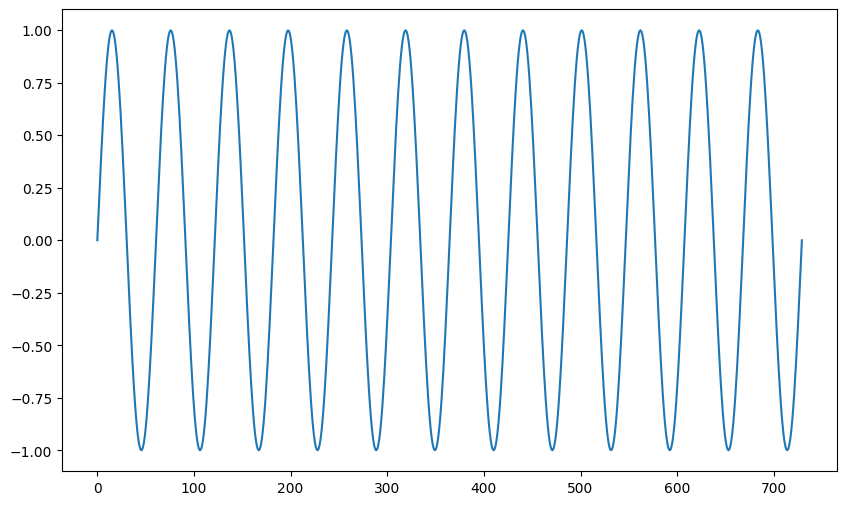

In [ ]:
df['y'].plot(figsize=(10,6))

In [ ]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzbm_c70t/tbhv2edq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzbm_c70t/pwng22hv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30208', 'data', 'file=/tmp/tmpzbm_c70t/tbhv2edq.json', 'init=/tmp/tmpzbm_c70t/pwng22hv.json', 'output', 'file=/tmp/tmpzbm_c70t/prophet_modeljmj6091i/prophet_model-20240517081920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

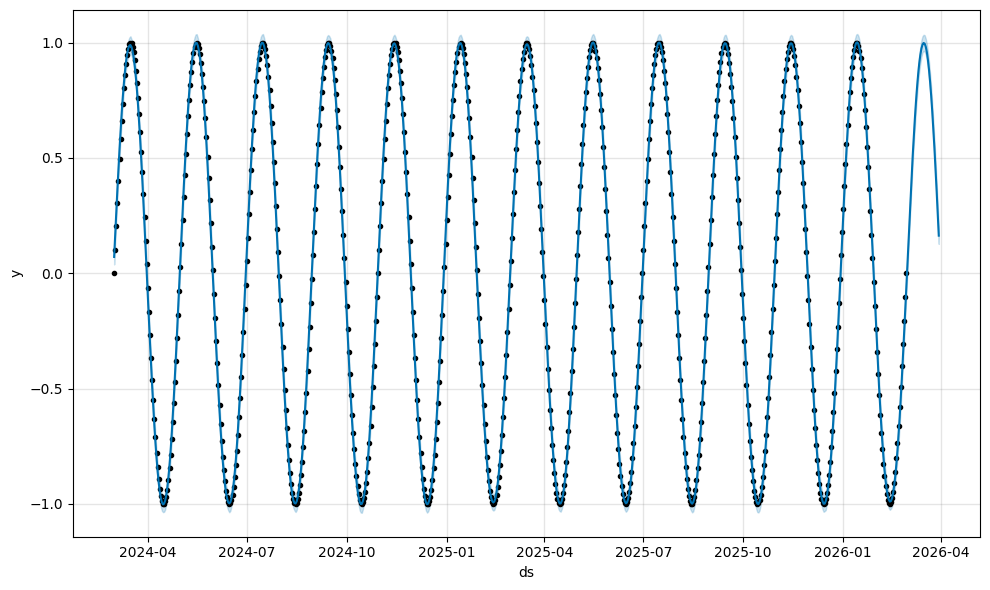

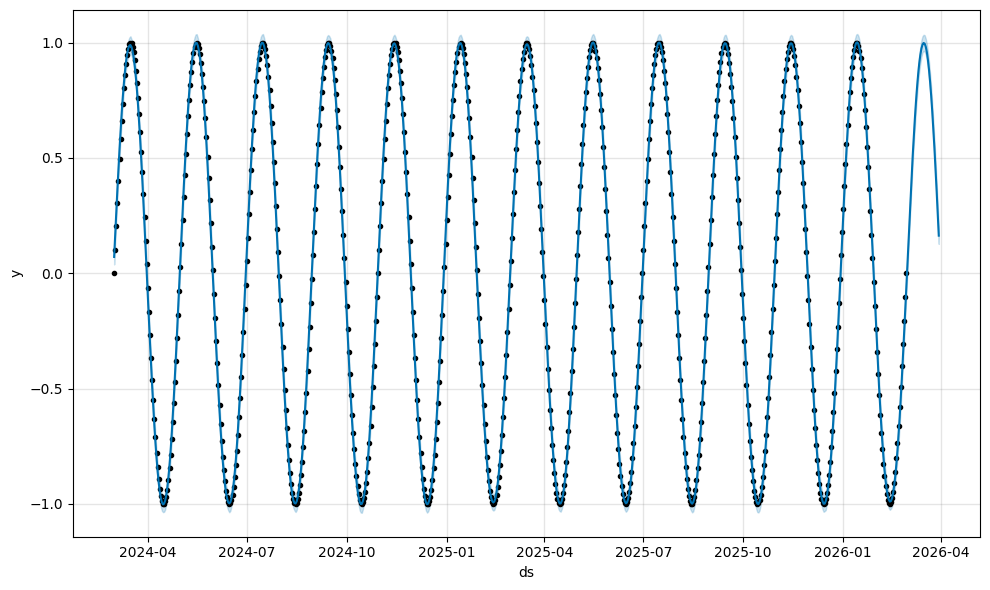

In [ ]:
m.plot(forecast)

<Axes: >

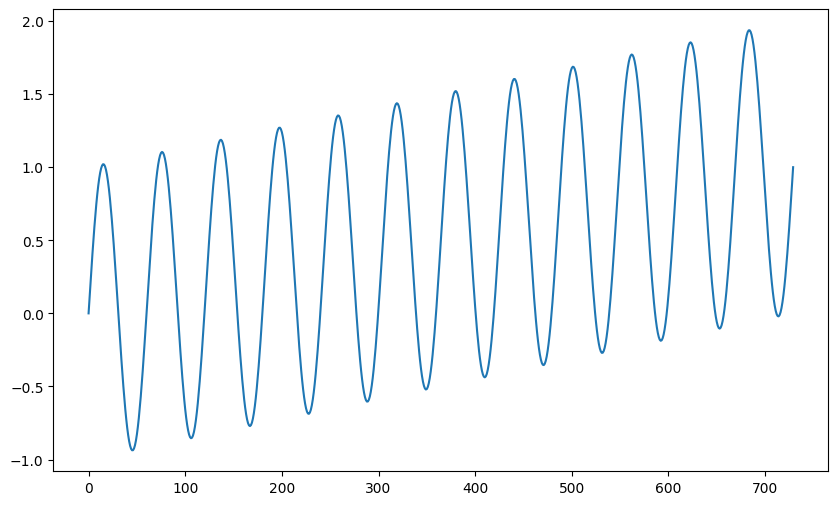

In [ ]:
time =np.linspace(0,1, 365*2)
result = np.sin(2*np.pi*12*time) + time
ds = pd.date_range('2024-03-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds':ds, 'y':result})

df['y'].plot(figsize=(10,6))


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzbm_c70t/75d4u6d4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzbm_c70t/8sbpnzru.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95341', 'data', 'file=/tmp/tmpzbm_c70t/75d4u6d4.json', 'init=/tmp/tmpzbm_c70t/8sbpnzru.json', 'output', 'file=/tmp/tmpzbm_c70t/prophet_model716beig1/prophet_model-20240517081923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


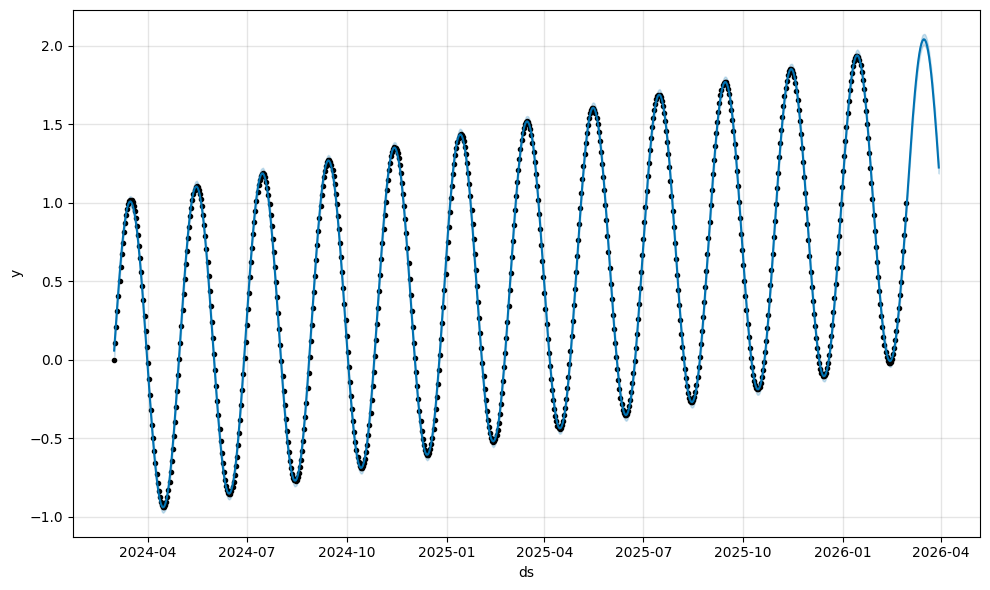

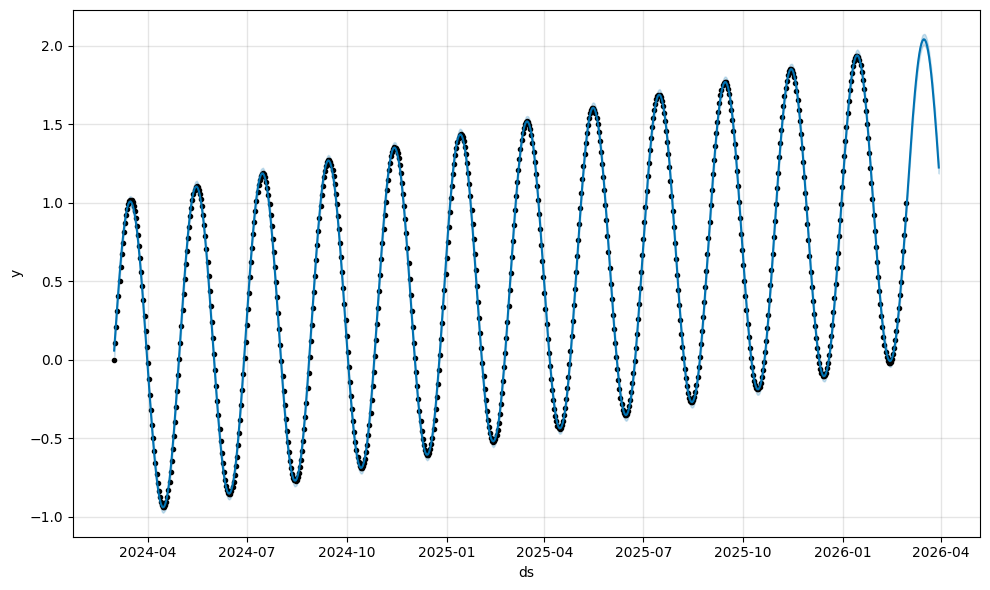

In [ ]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

<Axes: >

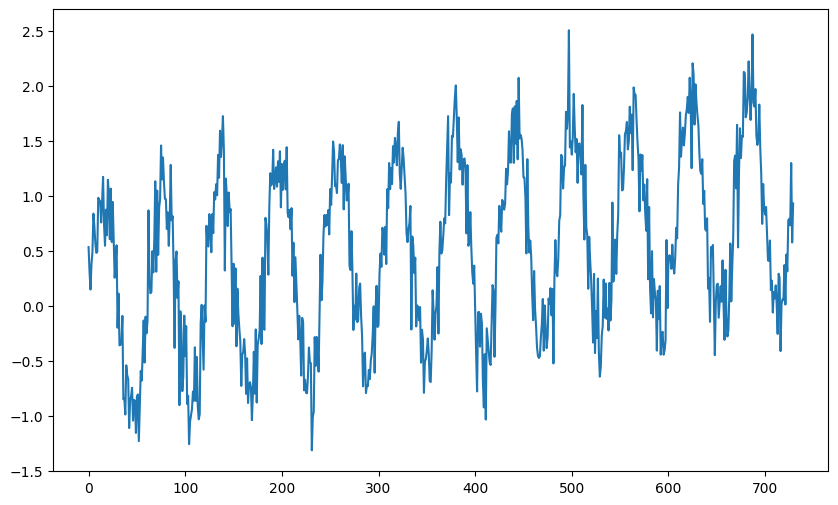

In [ ]:
time =np.linspace(0,1, 365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4
ds = pd.date_range('2024-03-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds':ds, 'y':result})

df['y'].plot(figsize=(10,6))

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzbm_c70t/gpxksu_4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzbm_c70t/av3kmmuc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3429', 'data', 'file=/tmp/tmpzbm_c70t/gpxksu_4.json', 'init=/tmp/tmpzbm_c70t/av3kmmuc.json', 'output', 'file=/tmp/tmpzbm_c70t/prophet_modelcm10p302/prophet_model-20240517081928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


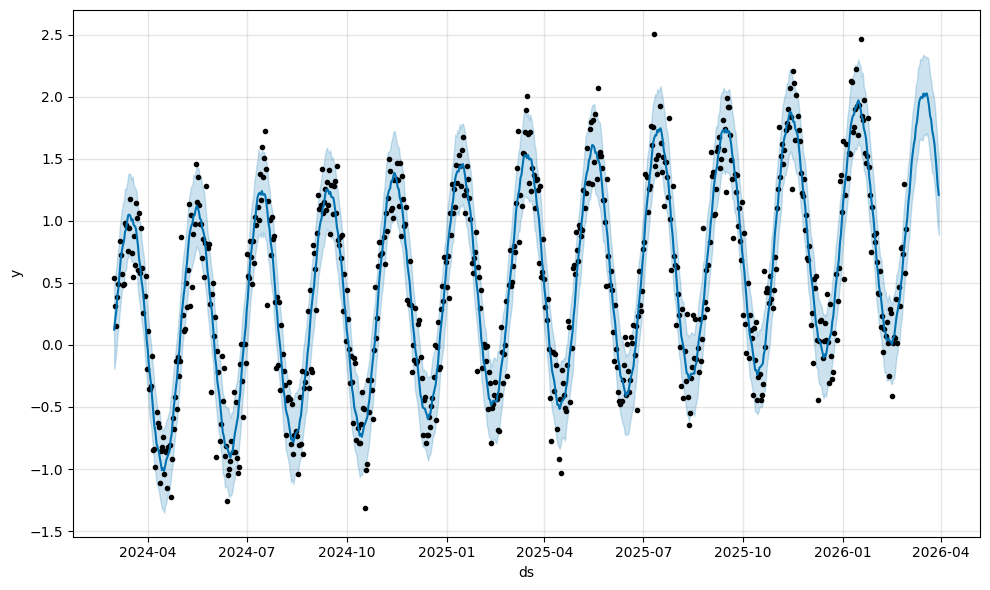

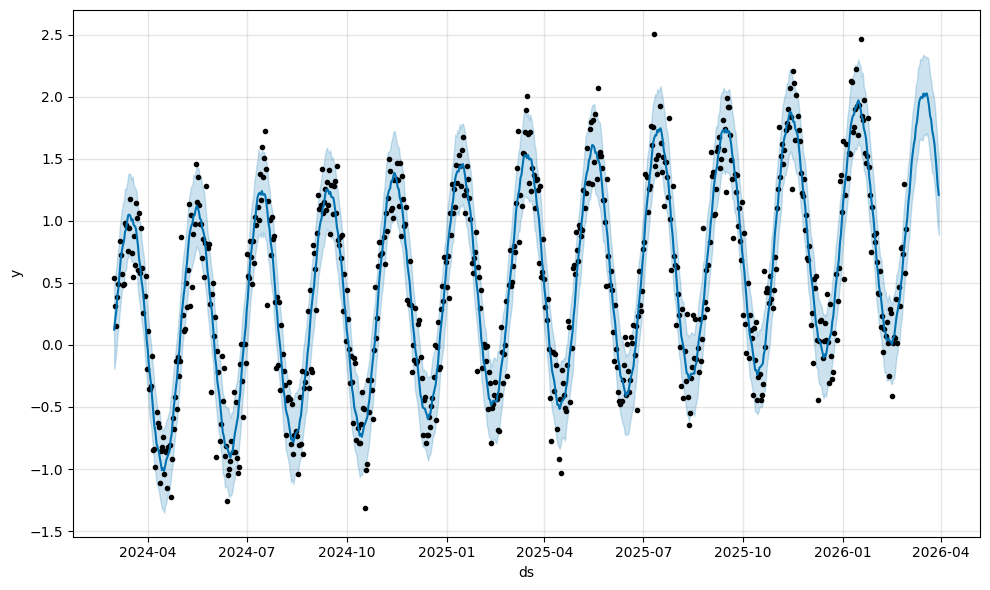

In [ ]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

## prophet 실습

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet
from datetime import datetime

get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
pinkwink = pd.read_csv(
    '/content/05_PinkWink_Web_Traffic.csv',
    encoding = 'utf-8', thousands = ',', names = ['date', 'hit'], index_col=0
)
pinkwink = pinkwink[pinkwink['hit'].notnull()]
pinkwink.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


<Axes: xlabel='date'>

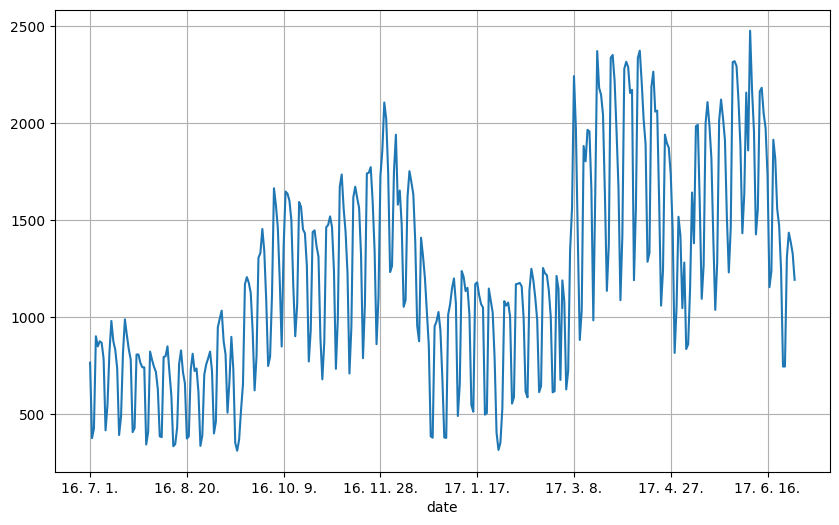

In [ ]:
pinkwink['hit'].plot(figsize=(10,6), grid=True)

In [ ]:
time = np.arange(0,len(pinkwink))
traffic = pinkwink['hit'].values

fx = np.linspace(0, time[-1], 1000)

def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y) ** 2))

    # sqrt = 루트

In [ ]:
# 차수 넣어서 계수 구하기
# 계수를 일차함수에 넣기

f1p = np.polyfit(time, traffic, 1)
f1 = np.poly1d(f1p)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

In [ ]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.6284101894695
429.53280466762925
330.4777305877038


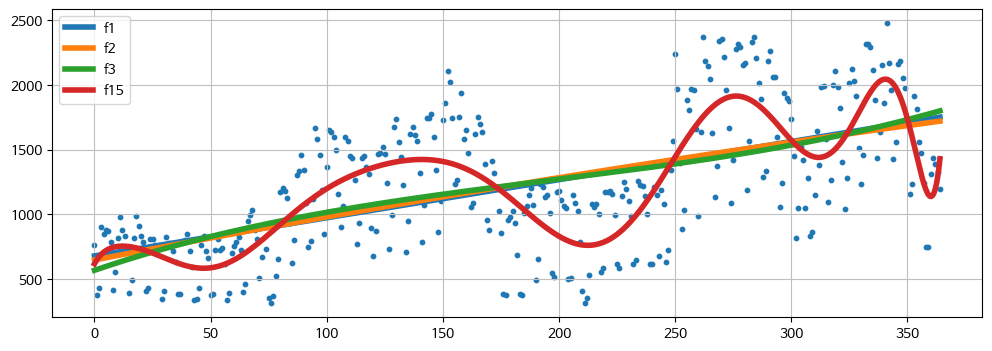

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
plt.rc('font', family='NanumBarunGothic')


plt.figure(figsize=(12,4))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc=2)
plt.show()

In [ ]:
df = pd.DataFrame({'ds':pinkwink.index, 'y':pinkwink['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%y. %m. %d.')
del df['date']
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [ ]:
m= Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=60)
future.tail()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzbm_c70t/rggucipr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzbm_c70t/poujby2j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99577', 'data', 'file=/tmp/tmpzbm_c70t/rggucipr.json', 'init=/tmp/tmpzbm_c70t/poujby2j.json', 'output', 'file=/tmp/tmpzbm_c70t/prophet_modeleepj7pdc/prophet_model-20240517082816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:28:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:28:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [ ]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,915.071569,723.250538,1133.661756
421,2017-08-26,500.015232,284.408189,717.198250
422,2017-08-27,632.573609,432.174152,845.676530
423,2017-08-28,1185.248126,981.274652,1402.075842
424,2017-08-29,1221.147026,1029.684438,1445.603548


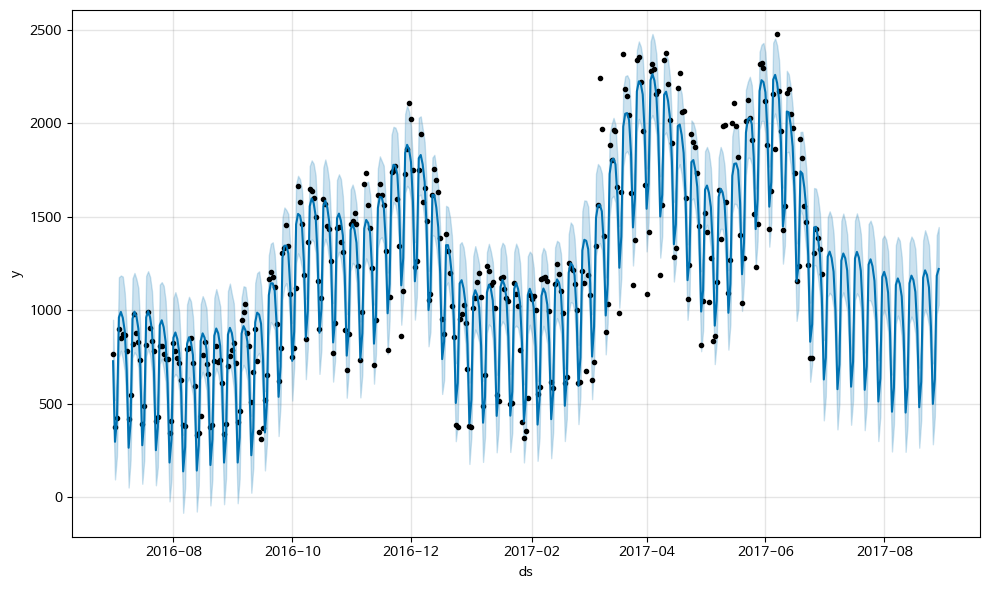

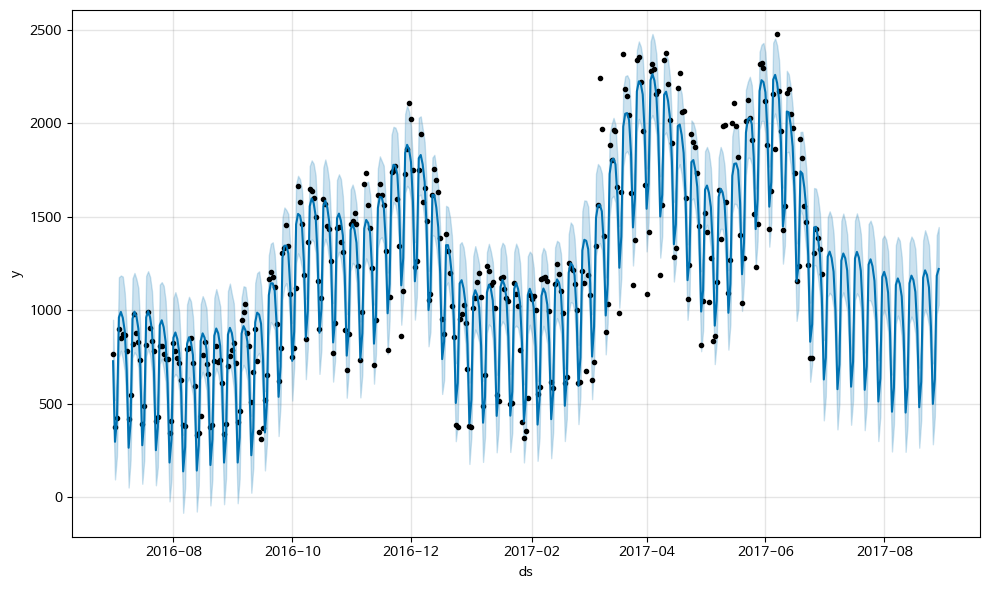

In [ ]:
m.plot(forecast)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:196: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


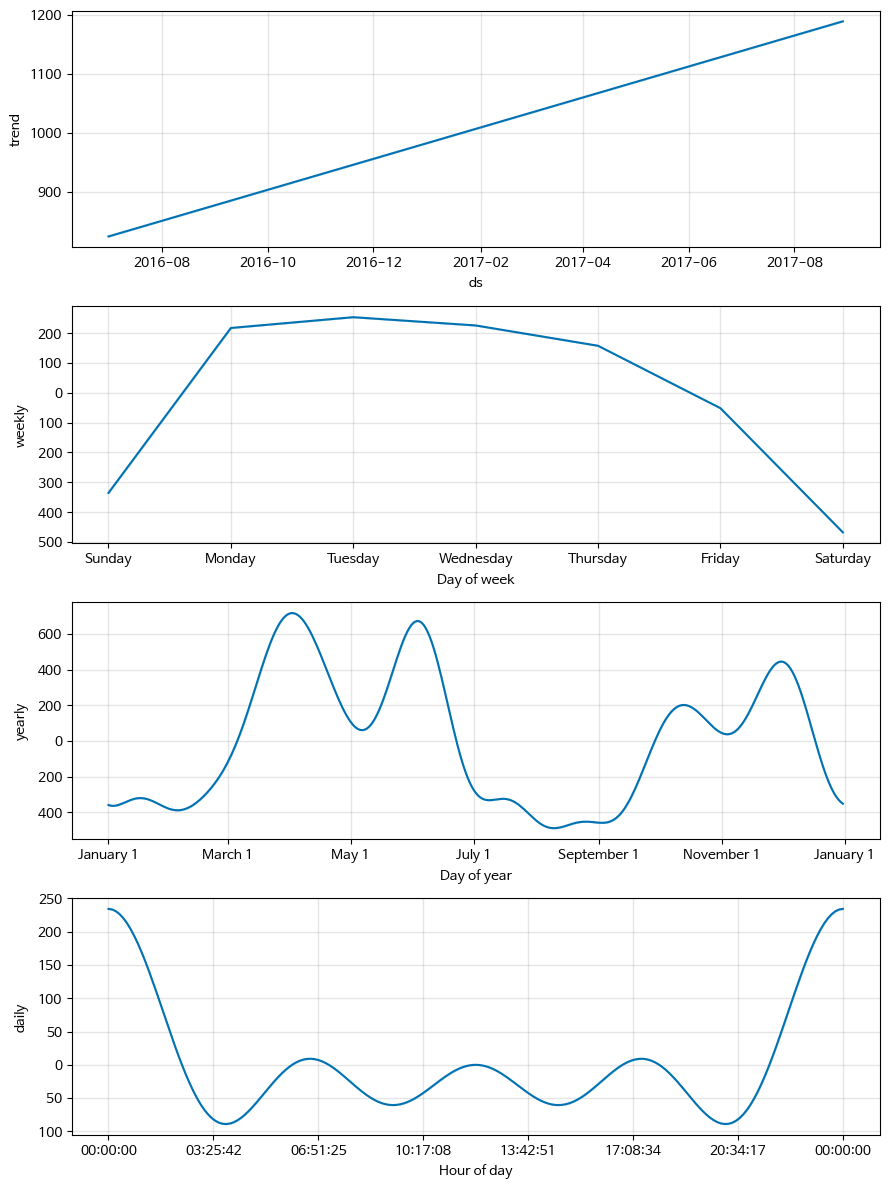

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


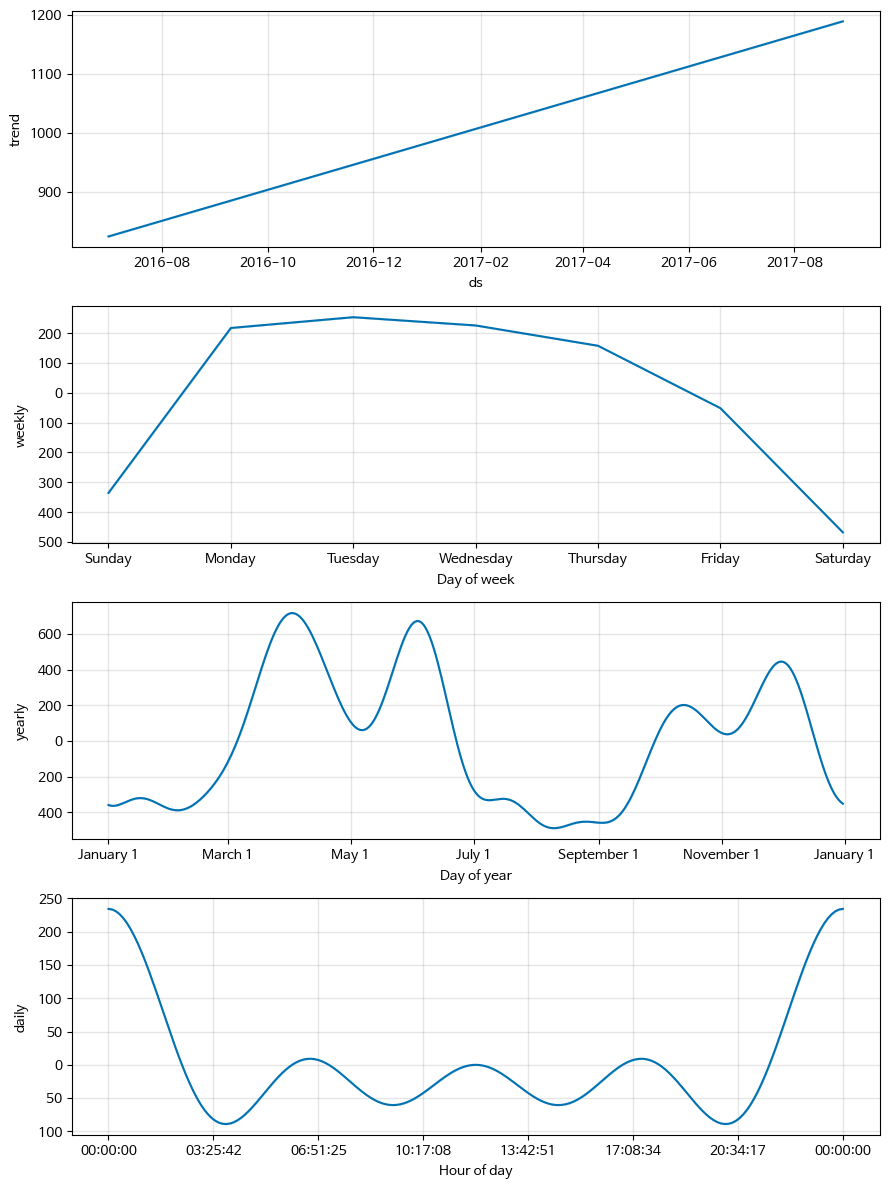

In [ ]:
# 트렌드 분석 plt_components()
m.plot_components(forecast)